# Terry Traffic Project 

# Business Overview 

### Background Knowledge 

A Terry stop, also known as a stop and frisk, is a legal principle that originates from the United States Supreme Court case Terry v. Ohio (1968). It refers to a brief detention or stop by law enforcement officers of an individual based on reasonable suspicion that the person has committed, is committing, or is about to commit a crime. The name "Terry" comes from the name of the petitioner in the aforementioned court case.

During a Terry stop, an officer is permitted to briefly detain an individual for questioning and may conduct a pat-down search (frisk) of the person's outer clothing if they have reasonable suspicion that the person is armed and dangerous. The purpose of a Terry stop is to allow law enforcement officers to protect themselves and others by ensuring their safety during interactions with potentially dangerous individuals.

It's important to note that a Terry stop is a lower level of intrusion compared to an arrest. While an arrest requires probable cause, a Terry stop requires only reasonable suspicion. The scope and duration of a Terry stop should be reasonable and limited to the circumstances that justified the stop in the first place.

The legality and specific procedures surrounding Terry stops can vary based on jurisdiction, as laws may differ in different countries and regions. It's essential to consult the laws and regulations of the specific jurisdiction in question to understand the exact legal framework and guidelines for Terry stops in that area.


# Problem Statement: Predicting Arrest Flag in Law Enforcement Data

Problem Description:

The aim of this project is to develop a classification model that can predict the likelihood of an arrest flag being raised during law enforcement incidents. The dataset contains various attributes related to law enforcement incidents, such as location, time, officer details, and other relevant factors. The target variable, "Arrest Flag," indicates whether an arrest was made during the incident.

The goal is to build a predictive model that can accurately classify incidents as either resulting in an arrest or not. This model can be used by law enforcement agencies to identify high-risk incidents or allocate resources more effectively.

# Objective:
The objective is to build a classification model that can predict the likelihood of an arrest flag being raised during law enforcement incidents. The model should be able to accurately classify incidents as either resulting in an arrest or not, based on the available attributes in the dataset.

# Evaluation:
The model will be evaluated based on its classification performance metrics, such as accuracy, precision, recall, and F1 score. The goal is to develop a model with high accuracy and balanced performance between the two classes (arrested vs. not arrested).

By successfully developing an accurate predictive model, law enforcement agencies can gain insights into the factors contributing to arrests and make informed decisions to enhance public safety and allocate resources efficiently.

 

# Data Understanding

This data represents records of police reported stops under Terry v. Ohio, 392 U.S. 1 (1968). Each row represents a unique stop.
Each record contains perceived demographics of the subject, as reported by the officer making the stop and officer demographics as reported to the Seattle Police Department, for employment purposes. 


Data sources available for the project:

 > Seattle Terry Traffic Stops dataset
    [SPD_Terry Stops](https://data.seattle.gov/Public-Safety/Terry-Stops/28ny-9ts8)

 > Additional datasets related to law enforcement, demographics, and geographic information (if applicable)
    [SPD- Terry Stops by Perceived race of Subject](https://data.seattle.gov/Public-Safety/SPD-Terry-Stops-by-Perceived-race-of-Subject/54qb-sp63)

Expected timeline for the project:

 > 4 Business days
 
#### DataSet Information 
             
             Updated
             May 18, 2023
 
   """Data Last Updated     May 18, 2023/    Metadata Last Updated / May 18, 2023"""

             Date Created
             April 13, 2017
   Frequency   Daily 
   Category    Public Safety
   Tags   [Police](https://data.seattle.gov/browse?tags=police), [Terrystops](https://data.seattle.gov/browse?tags=terry%20stops), [Detentions](https://data.seattle.gov/browse?tags=detentions)
   
#### What is in the Dataset 
 
We have over 2million rows but we will only request for 50000rows and the 23 columns 

Every row is unique identifier 

#### Dataset columns Information 
 1.Subject Age Group	Subject Age Group (10 year increments) as reported by the officer.

 2.Subject ID	Key, generated daily, identifying unique subjects in the dataset using a character to character match of first name and last name. "Null" values indicate an "anonymous" or "unidentified" subject. Subjects of a Terry Stop are not required to present identification.

 3.GO / SC Num	General Offense or Street Check number, relating the Terry Stop to the parent report. This field may have a one to many relationship in the data.

 4.Terry Stop ID	Key identifying unique Terry Stop reports.

 5.Stop Resolution	Resolution of the stop as reported by the officer.
 
 6.Weapon Type	Type of weapon, if any, identified during a search or frisk of the subject. Indicates "None" if no weapons was found.

 7.Officer ID	Key identifying unique officers in the dataset.
 
 8.Officer YOB	Year of birth, as reported by the officer.
 
 9.Officer Gender	Gender of the officer, as reported by the officer.
 
 10.Officer Race	Race of the officer, as reported by the officer.
 
 11.Subject Perceived Race	Perceived race of the subject, as reported by the officer.
 
 12.Subject Perceived Gender	Perceived gender of the subject, as reported by the officer.

 13.Reported Date	Date the report was filed in the Records Management System (RMS). Not necessarily the date the stop occurred but generally within 1 day.
 
 14.Reported Time	Time the stop was reported in the Records Management System (RMS). Not the time the stop occurred but generally within 10 hours.
 
 15.Initial Call Type	Initial classification of the call as assigned by 911.
 
 16.Final Call Type	Final classification of the call as assigned by the primary officer closing the event.
 
 17.Call Type	How the call was received by the communication center.
 
 18.Officer Squad	Functional squad assignment (not budget) of the officer as reported by the Data Analytics Platform (DAP).
 
 19.Arrest Flag	Indicator of whether a "physical arrest" was made, of the subject, during the Terry Stop. Does not necessarily reflect a report of an arrest in the Records Management System (RMS).

 20.Frisk Flag	Indicator of whether a "frisk" was conducted, by the officer, of the subject, during the Terry Stop.
 
 21Precinct	Precinct of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.
 
 22.Sector	Sector of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

 23.Beat	Beat of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.


# Data Preparation 

###### Import Libraries 

In [1]:
#Import libraries 
import requests
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss
import joblib
import json


import warnings
warnings.filterwarnings('ignore')

## API Request Dataset

In [2]:
#Web url
url = "https://data.seattle.gov/resource/28ny-9ts8.json"
#size of data
params = {"$limit": 50000}  # Specify the limit parameter for the number of rows to retrieve
#get the url dataset
response = requests.get(url, params=params)
#return in a json 
data = response.json()

#convert the jsonfile to DataFrame 
df = pd.DataFrame(data)
#read in csv
df.to_csv('data.csv', index=False)

### Load Terry Traffic Stops Dataset(Pandas)

### Data Preparation 

In [3]:
#Dataframe 
terry_stops = pd.read_csv('data.csv')
terry_stops.columns

Index(['subjectagegroup', 'subjectid', 'go_num', 'terry_stop_id', 'resolution',
       'weapon_type', 'officerid', 'officer_yob', 'officer_gender',
       'officer_race', 'subjectrace', 'subjectgender', 'reported_date',
       'reported_time', 'initialcalltype', 'finalcalltype', 'calltype',
       'arrestflag', 'friskflag', 'precinct', 'sector', 'beat',
       'officersquad'],
      dtype='object')

In [4]:
#Dataframe information 
terry_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   subjectagegroup  50000 non-null  object
 1   subjectid        50000 non-null  int64 
 2   go_num           50000 non-null  int64 
 3   terry_stop_id    50000 non-null  int64 
 4   resolution       50000 non-null  object
 5   weapon_type      50000 non-null  object
 6   officerid        50000 non-null  object
 7   officer_yob      50000 non-null  int64 
 8   officer_gender   50000 non-null  object
 9   officer_race     50000 non-null  object
 10  subjectrace      50000 non-null  object
 11  subjectgender    50000 non-null  object
 12  reported_date    50000 non-null  object
 13  reported_time    50000 non-null  object
 14  initialcalltype  50000 non-null  object
 15  finalcalltype    50000 non-null  object
 16  calltype         50000 non-null  object
 17  arrestflag       50000 non-null

> Based on the information above its only right to note that 
           
           * Officersquad column has missing values - ok and we will fill it with a "Uncategorized" element 
    
           * Our dataset has alot of categorical columns "perfect for project" which is what we are looking for 

In [5]:
#Look at the value_counts of the columns 
for col in terry_stops.columns:
    try:
        print(terry_stops[col].value_counts())
    except:
        print(terry_stops[col].value_counts())   
    print('\n')

26 - 35         18076
36 - 45         11299
18 - 25          9779
46 - 55          6003
56 and Above     2350
1 - 17           1683
-                 810
Name: subjectagegroup, dtype: int64


-1              30084
 7753260438        29
 7727267937        28
 37331110994       27
 7727921967        27
                ...  
 48843641990        2
 48778414769        1
 7742034743         1
 38783165336        1
 7731549216         1
Name: subjectid, Length: 4375, dtype: int64


20150000300988    31
20190000152902    27
20180000239365    23
20170000288839    23
20190000029265    23
                  ..
20230000006915     3
20230000093667     2
20230000094595     2
20230000094621     2
20230000095313     1
Name: go_num, Length: 12114, dtype: int64


15045077325    12
13080077761    11
22899683128     9
27511831225     9
12105013403     8
               ..
460799          3
48982293108     2
48981117185     2
48974752727     2
48985858048     1
Name: terry_stop_id, Length: 13612, dtype: int6

> We might have a problem imbalance in our data the arest column only has "Arrest" element, choose a weapon type as problem statement
    
    Look for other data resources 
    
> Notice a "-" character
        
    Find out the columns, list the columns and replace it with "Choosen string"

## Data Cleaning 

### Structural Fixing

In [6]:
# columns with "-" character 
character_cols = ['subjectagegroup', 'weapon_type', 'subjectrace', 'subjectgender', 'initialcalltype', 'finalcalltype', 'calltype', 'friskflag', 'precinct', 'sector', 'beat']               
#Since columns are not similar we will input 
terry_stops['subjectagegroup'] = terry_stops['subjectagegroup'].replace('-', 'Not Specified')
terry_stops['weapon_type'] = terry_stops['weapon_type'].replace('-', 'None')
terry_stops['subjectrace'] = terry_stops['subjectrace'].replace('-', 'Unknown')
#replace '-'and 'unknown' as 'Unable to Determine'
terry_stops['subjectgender'] =terry_stops['subjectgender'].replace('-', 'Unable to Determine')
terry_stops['subjectgender'] =terry_stops['subjectgender'].replace('Unknown', 'Unable to Determine')
#join the 'subjectgender' columns 

terry_stops['initialcalltype'] = terry_stops['initialcalltype'].replace('-', 'Not_specified')
terry_stops['finalcalltype'] =terry_stops['finalcalltype'].replace('-', 'Unspecified')
terry_stops['calltype'] =terry_stops['calltype'].replace('-', 'Unknown')
terry_stops['friskflag'] =terry_stops['friskflag'].replace('-', ' Not_specified')
terry_stops['precinct'] = terry_stops['precinct'].replace('-', 'Unavailable ')
terry_stops['sector'] =terry_stops['sector'].replace('-', 'No_mention')
terry_stops['beat'] =terry_stops['beat'].replace('-', 'Not_specified ')

#####  Dealing with missing values and duplicats 

In [7]:
#Missing Values 
terry_stops.isna().sum(), print(terry_stops.duplicated().sum())

36358


(subjectagegroup        0
 subjectid              0
 go_num                 0
 terry_stop_id          0
 resolution             0
 weapon_type            0
 officerid              0
 officer_yob            0
 officer_gender         0
 officer_race           0
 subjectrace            0
 subjectgender          0
 reported_date          0
 reported_time          0
 initialcalltype        0
 finalcalltype          0
 calltype               0
 arrestflag             0
 friskflag              0
 precinct               0
 sector                 0
 beat                   0
 officersquad       20168
 dtype: int64,
 None)

> So we have no duplicates "tick", but we do have missing values in officersquad

In [8]:
# fill the NaNS with N/A
terry_stops['officersquad'].fillna('N/A', inplace=True)

#### Datetime conversion, new columns for:day, month and year. 
#### Officers age 

 Will need to convert the reported time to datetime and create new columns for month , year and even day. 
 
 Create a new column for officer Ages 

In [9]:
#convert to datetime 
terry_stops['reported_date'] = pd.to_datetime(df['reported_date'], yearfirst=True)

In [10]:
#extract day, month, year for trends 
#day
terry_stops['Day_of_month'] =terry_stops['reported_date'].dt.day
#month
terry_stops['Month'] =terry_stops['reported_date'].dt.month
#year
terry_stops['Year'] =terry_stops['reported_date'].dt.year

In [11]:
# Officers ages 
terry_stops['Officer_Age'] = 2023-terry_stops['officer_yob']

## Officers Age 

> we will drop age values higher than 100 

In [12]:
# Note we have an outlier in officer_yob 
# lets remove yobs element greater than 100 
terry_stops.drop(terry_stops[(terry_stops['Officer_Age'] >100) & (terry_stops['Officer_Age'] < 125)].index, inplace=True)
terry_stops.head()

subjectagegroup    subjectid          go_num  terry_stop_id resolution  \
0    56 and Above   7727772116  20220000069562    32213674448     Arrest   
1    56 and Above           -1  20160000310013         187307     Arrest   
2         26 - 35           -1  20160000266736         177332     Arrest   
3         18 - 25  32612601824  20220000082971    32612924518     Arrest   
4         18 - 25  13270345765  20200000181208    13355225318     Arrest   

                 weapon_type officerid  officer_yob officer_gender  \
0                       None      7735         1991              M   
1                       None      7560         1986              M   
2  Lethal Cutting Instrument      7691         1971              M   
3                       None      8836         1997              M   
4                       None      7390         1981              F   

  officer_race  ... arrestflag friskflag precinct sector beat  \
0        White  ...          Y         N     East      G   G3   
1        White  ...          N         N    South      R   R2   
2        White  ...          N         Y    South      R   R1   
3        White  ...          Y         N     West      D   D1   
4        White  ...          Y         Y    South      O   O1   

                           officersquad Day_of_month Month  Year Officer_Age  
0                                   N/A           20     3  2022          32  
1          SOUTH PCT 1ST W - R/S RELIEF           27     8  2016          37  
2  SOUTH PCT 2ND W - ROBERT - PLATOON 2           25     7  2016          52  
3                                   N/A            3     4  2022          26  
4                                   N/A            6     6  2020          42  

[5 rows x 27 columns]

### Converting columns 

to numericals and combining them with different categories, 

In [13]:
#Rather than having all this lets put them together and categorize them if weapon is a firearm , non_firearm or none
terry_stops['weapon_type'] = terry_stops['weapon_type'].map({'Lethal Cutting Instrument': 'Non-Firearm', 
                                           'Knife/Cutting/Stabbing Instrument': 'Non-Firearm',
                                           'Club, Blackjack, Brass Knuckles': 'Non-Firearm',
                                           'Blunt Object/Striking Implement': 'Non-Firearm',
                                           'Mace/Pepper Spray': 'Non-Firearm', 'Club':'Non-Firearm',
                                           'Taser/Stun Gun':'Non-Firearm', 'Blackjack':'Non-Firearm',
                                           'Brass Knuckles':'Non-Firearm', 'Fire/Incendiary Device':'Non-Firearm',
                                           'Handgun':'Firearm','Firearm Other':'Firearm',
                                           'Firearm (unk type)':'Firearm','Firearm':'Firearm',
                                           'Other Firearm':'Firearm', 'Rifle':'Firearm','Shotgun':'Firearm',
                                           'Automatic Handgun':'Firearm','None':'None','Personal Weapons (hands, feet, etc.)':'Non-Firearm',
                                           'None/Not Applicable':'None', 'Handgun':'Firearm'})

In [14]:
#value counts categories 
to_replace = terry_stops["officersquad"].value_counts()[terry_stops["officersquad"].value_counts() < 200].index.values
terry_stops.replace(to_replace, value="other_region", inplace=True)
#value counts categories 
to_replace = terry_stops["precinct"].value_counts()[terry_stops["precinct"].value_counts() < 200].index.values
terry_stops.replace(to_replace, value="other_precinct", inplace=True)

# Exploratory Data Analysis 

In [15]:
#descrptive Ananysis
terry_stops.describe()

subjectid        go_num  terry_stop_id   officer_yob  Day_of_month  \
count  4.992400e+04  4.992400e+04   4.992400e+04  49924.000000  49924.000000   
mean   5.238722e+09  2.018335e+13   8.158699e+09   1984.910684     15.868660   
std    8.687344e+09  2.135333e+10   1.206785e+10      8.053221      8.863136   
min   -1.000000e+00  2.009000e+13   2.852900e+04   1953.000000      1.000000   
25%   -1.000000e+00  2.017000e+13   2.547298e+05   1981.000000      8.000000   
50%   -1.000000e+00  2.018000e+13   4.958550e+05   1986.000000     16.000000   
75%    7.735583e+09  2.020000e+13   1.307843e+10   1991.000000     24.000000   
max    4.898196e+10  2.023000e+13   4.898586e+10   2000.000000     31.000000   

              Month          Year   Officer_Age  
count  49924.000000  49924.000000  49924.000000  
mean       6.478407   2018.357784     38.089316  
std        3.373431      2.119609      8.053221  
min        1.000000   2015.000000     23.000000  
25%        4.000000   2017.000000     32.000000  
50%        6.000000   2018.000000     37.000000  
75%        9.000000   2020.000000     42.000000  
max       12.000000   2023.000000     70.000000

#### Correlation Matrix

In [17]:
sns.heatmap(terry_stops.corr())
plt.title('column Relationship')
plt.show()

> There is no much correlation in the dataset this mi lets go ahead and start digging into the columns 

Lets visualize the count distribution of the data 

### General Distribution 

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axes for subplots
fig, axes = plt.subplots(6, 3, figsize=(20, 30))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define the columns for count plots
columns = ['subjectagegroup', 'weapon_type', 'sector', 'beat','officer_yob', 'officer_gender', 'officer_race','subjectrace', 'Month', 'Year', 
           'Day_of_month', 'officersquad','precinct', 'friskflag', 'arrestflag',
          'subjectgender', 'resolution']

# Iterate over columns and create count plots
for i, column in enumerate(columns):
    ax = axes[i]
    if column in terry_stops.columns and terry_stops[column].nunique() > 0:
        sns.countplot(data=terry_stops, y=column, ax=ax)
        ax.set_xlabel('Count')
        ax.set_ylabel(column)
        ax.set_title(f'Count Plot of {column}')
    else:
        ax.axis('off')  # Hide empty subplots

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

> Now lets dive into our Problem statement dataset distrubution 

Description 
> No arrest flag, is any, identified  during a search or frisk of the subject. 

> Indicates "None" if no arrest were many.

### Univariate analysis
Focus: problem statement put it into account: 'Arrest flag' column

In [19]:
#Descriptive Statistics 
terry_stops['arrestflag'].describe()

count     49924
unique        2
top           N
freq      30065
Name: arrestflag, dtype: object

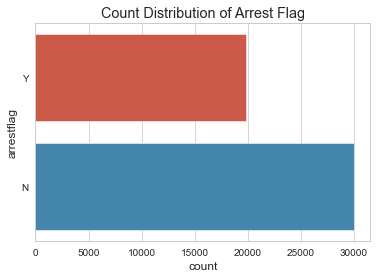

In [182]:
#lets see our dependant 
sns.countplot(data=terry_stops, y ='arrestflag')
plt.title('Count Distribution of Arrest Flag')
plt.show()

> The highest number of arrest flag * None

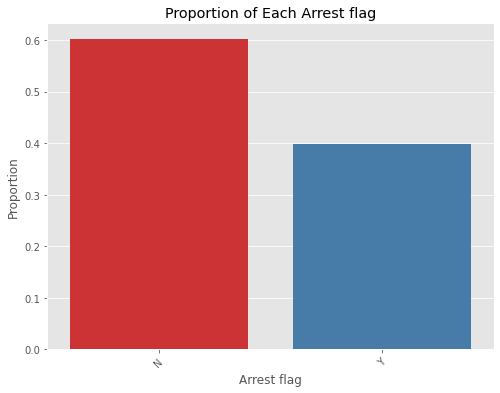

In [21]:
# percentage distributions 
# Calculate the proportion of each arrest
weapon_type_summary = (terry_stops['arrestflag']
                       .value_counts(normalize=True)
                       .rename_axis('arrestflag')
                       .reset_index(name='Proportion'))

# Plot the results
plt.figure(figsize=(8, 6))
sns.barplot(data=weapon_type_summary, x='arrestflag', y='Proportion', palette='Set1')
plt.xlabel('Arrest flag')
plt.ylabel('Proportion')
plt.title('Proportion of Each Arrest flag')
plt.xticks(rotation=45)
plt.show()


> No  aresst flag is still dominating on the count values 

What about resolution 

In [22]:
terry_stops.resolution.value_counts()

Arrest    49924
Name: resolution, dtype: int64

Ok we only have 1 outcome 
We will plot:
        
        * Univariate, 
        * Bivariate, and 
        * Multivariate


#### Lets start with looking at our Officers 

Age univariate Analysis

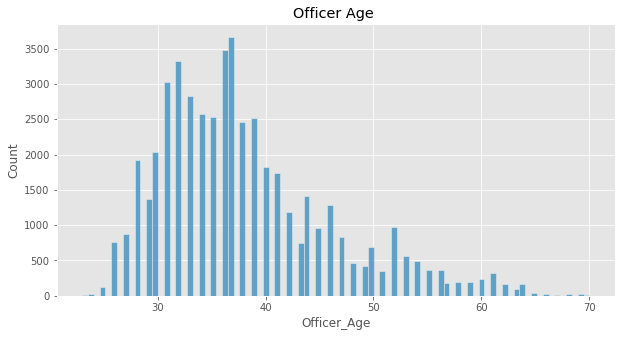

In [23]:
#Officers Age distribution 
fig = plt.figure(figsize=(10, 5))
sns.histplot(data=terry_stops, x='Officer_Age')
plt.title('Officer Age ')
plt.show()

> Highest Age count of police officers are between 30 and 40 spread out, but its skewed 

#### Bivariate Analysis for Age range and weapon type 

In [24]:
#Investgate subject weapon type and officers age 
cross_tab1 = pd.crosstab(terry_stops['arrestflag'], terry_stops['Officer_Age'])
cross_tab1 

Officer_Age  23  24   25   26   27    28   29    30    31    32  ...   61  \
arrestflag                                                       ...        
N             0   0    0   24   83   389  385   752  1676  1973  ...  304   
Y            10  30  119  733  793  1534  989  1282  1344  1346  ...   13   

Officer_Age   62  63   64  65  66  67  68  69  70  
arrestflag                                         
N            122  84  148  41  29  11  28  20   4  
Y             39  11   16   4   0   0   0   3   3  

[2 rows x 48 columns]

> There is an increase in the ages from 26 and after 39 there is a dicrease, ok so arrests no arrests are maimly done by this ages 

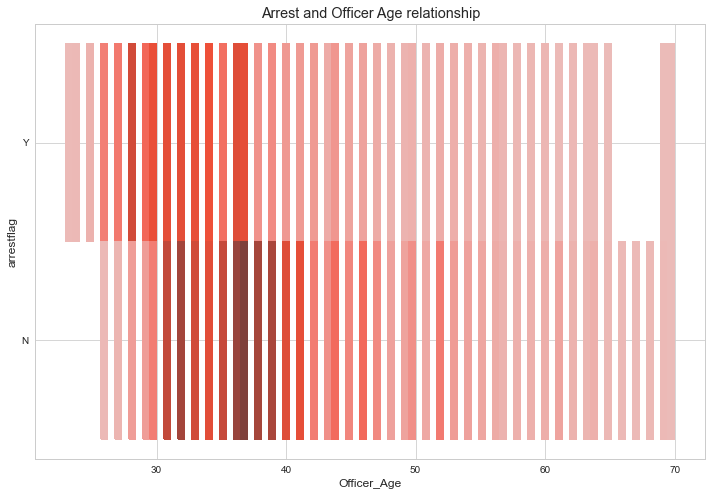

In [183]:
fig = plt.figure(figsize=(12,8))
sns.histplot(data=terry_stops, x="Officer_Age",y="arrestflag")
plt.title('Arrest and Officer Age relationship')
plt.show()

> between the ages of 30 and 40 and they are making terry stoping with the highest count 

#### lets see what officers arrestflag and frisk flag have to say 

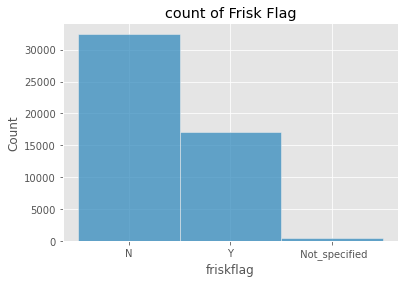

In [26]:
sns.histplot(x=terry_stops['friskflag'])
plt.title('count of Frisk Flag')
plt.show()

> During a Terry stoped the highest count is that they were not frisked when stoped 


#### Bivariate of Arrest flag and Frisk flag
Lets go deaper and understand if :
            
            Arrestflag: Arrest is associated with high suspect having a weapon 
            Friskfla: If certain weapons are more likely to result to a frisk

Text(0.5, 1.0, 'Relationship Weapon and Frisk Flag')

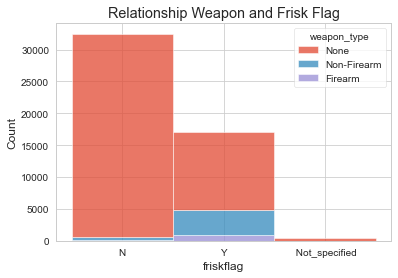

In [187]:
sns.histplot(data=terry_stops, x="friskflag",hue="weapon_type", multiple="stack")
plt.title('Relationship Weapon and Frisk Flag')

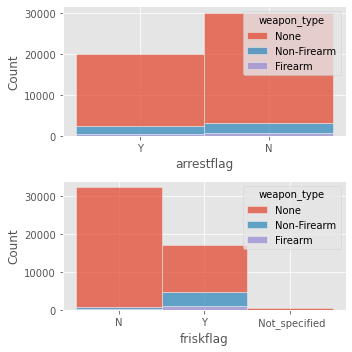

In [27]:
#Aresstflag and weapon_type plot
fig, axes = plt.subplots(2, 1, figsize=(5, 5))
sns.histplot(data=terry_stops, x="arrestflag",hue="weapon_type", multiple="stack", ax=axes[0])
sns.histplot(data=terry_stops, x="friskflag",hue="weapon_type", multiple="stack", ax=axes[1])
plt.tight_layout()

>Point of interest during a terry highest count arrest flag have no weapon 

>Point of interrest during a terry if you are frisked its most likely there was no firearm however non firearm are catching uo


> The department has white police officers compared to other categories 

#### Bivariate Annalysis 
Lets add weapon type 

In [28]:
terry_stops.head()

subjectagegroup    subjectid          go_num  terry_stop_id resolution  \
0    56 and Above   7727772116  20220000069562    32213674448     Arrest   
1    56 and Above           -1  20160000310013         187307     Arrest   
2         26 - 35           -1  20160000266736         177332     Arrest   
3         18 - 25  32612601824  20220000082971    32612924518     Arrest   
4         18 - 25  13270345765  20200000181208    13355225318     Arrest   

   weapon_type officerid  officer_yob officer_gender officer_race  ...  \
0         None      7735         1991              M        White  ...   
1         None      7560         1986              M        White  ...   
2  Non-Firearm      7691         1971              M        White  ...   
3         None      8836         1997              M        White  ...   
4         None      7390         1981              F        White  ...   

  arrestflag friskflag precinct sector beat  \
0          Y         N     East      G   G3   
1          N         N    South      R   R2   
2          N         Y    South      R   R1   
3          Y         N     West      D   D1   
4          Y         Y    South      O   O1   

                           officersquad Day_of_month Month  Year Officer_Age  
0                                   N/A           20     3  2022          32  
1          SOUTH PCT 1ST W - R/S RELIEF           27     8  2016          37  
2  SOUTH PCT 2ND W - ROBERT - PLATOON 2           25     7  2016          52  
3                                   N/A            3     4  2022          26  
4                                   N/A            6     6  2020          42  

[5 rows x 27 columns]

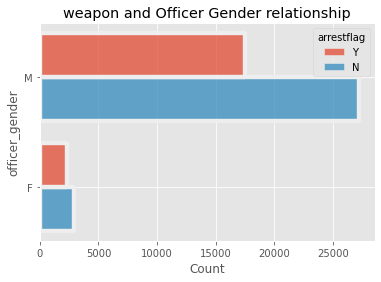

In [29]:
#officer race and weapon type during terry stop
sns.histplot(data=terry_stops, y="officer_gender", hue="arrestflag", multiple="dodge", shrink=.8)
plt.title('weapon and Officer Gender relationship')
plt.show()

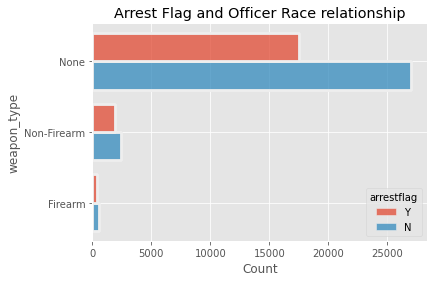

In [30]:
#what was the arrest flag resolution 
sns.histplot(data=terry_stops, y="weapon_type", hue="arrestflag", multiple="dodge", shrink=.8)
plt.title('Arrest Flag and Officer Race relationship')
plt.show()

> officer genger male is the highest 

> During a terry stop white race conduct highest count in frisking count but we can also see yrisking count having increade by a number of percentage 

> During a Terry stop by a white officer it does not mean resolution will be Arrest 

### move on to Officer squad 

Officersquad

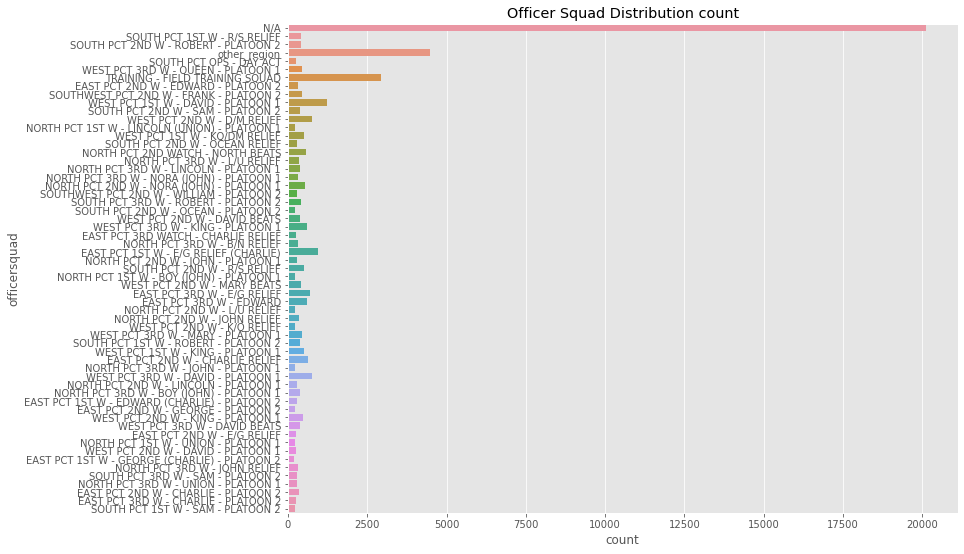

In [31]:
#officer squad check values 
fig = plt.figure(figsize=(12,9))
sns.countplot(data=terry_stops, y='officersquad')
plt.title('Officer Squad Distribution count')
plt.show()

> Non identified squads have the highest counts 

lets add our target 

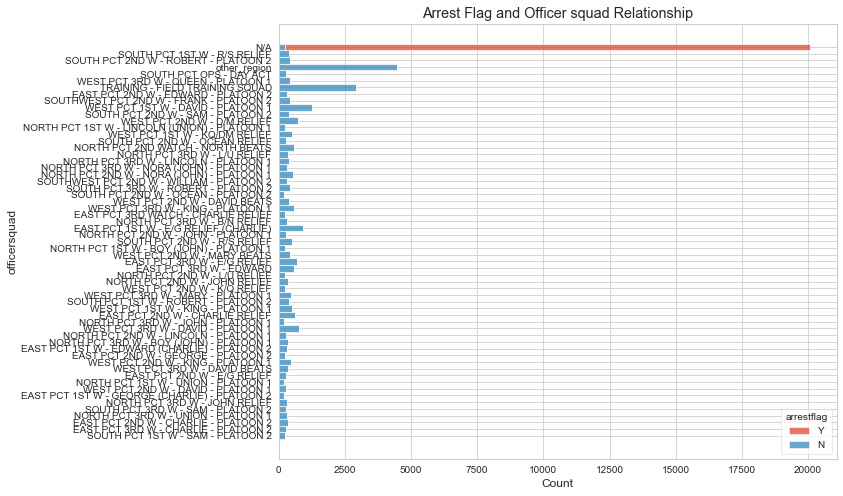

In [192]:
fig=plt.figure(figsize=(10,8))
sns.histplot(data=terry_stops, y='officersquad', hue='arrestflag', multiple='stack')
plt.title('Arrest Flag and Officer squad Relationship')
plt.show()

> seems N/A squad have arrest flag as highest combaired to the rest , we should also put into factor it has the highest count values

Lets see the officers gender 

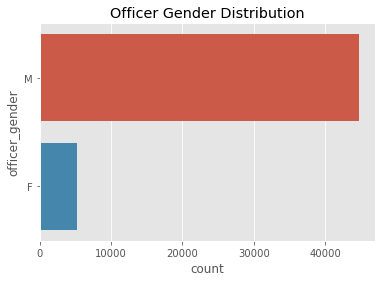

In [33]:
sns.countplot(data=terry_stops, y='officer_gender')
plt.title('Officer Gender Distribution')
plt.show()

> Male have the highest count

lets add another factor our target weapon type

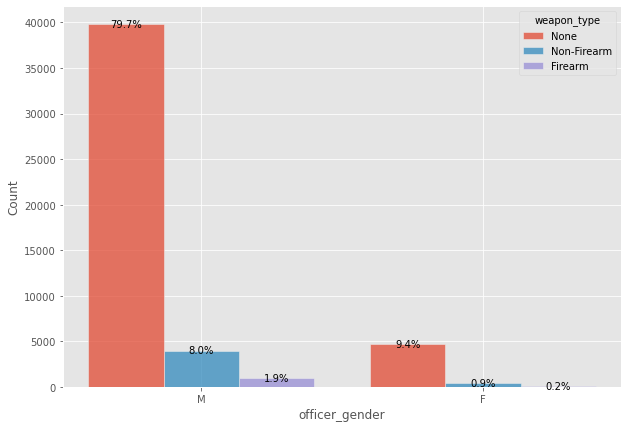

In [34]:
#gender distribution by percentage 
fig = plt.figure(figsize=(10,7))
ax = sns.histplot(data=terry_stops, x="officer_gender", hue="weapon_type", multiple="dodge", shrink=.8)

for p in ax.patches:
    ax.annotate(f"{p.get_height()/terry_stops.shape[0]*100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

plt.show()

> male officers have the highest percentage of finding the a none weapon type this could be becaouse they have the highest count

### Params 2  our subject Subject 

lets dig Univariate analysis 

abit about the subjects 

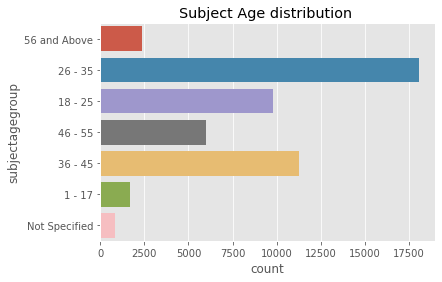

In [35]:
#subjects age 
sns.countplot(data=terry_stops, y='subjectagegroup')
plt.title('Subject Age distribution ')
plt.show()

> highest count number are ages between 26 and 35

lets do a bivariate analysis 

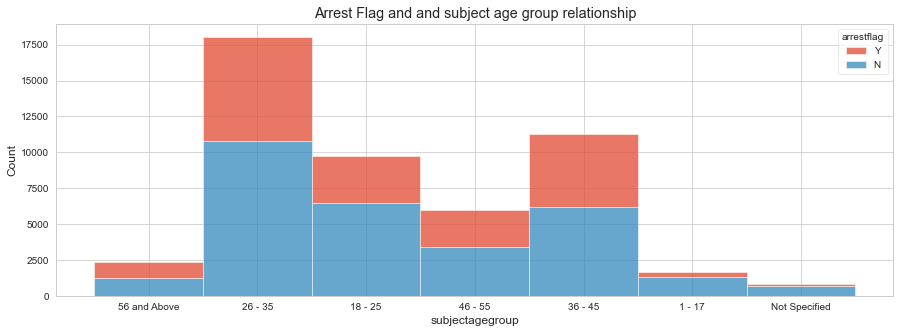

In [188]:
fig = plt.figure(figsize=(15, 5))
sns.histplot(data=terry_stops, x="subjectagegroup", hue="arrestflag", multiple="stack")
plt.title('Arrest Flag and and subject age group relationship')
plt.show()

> Ages 26-35 have the highest arrest flag  arrest flag but 36-45 is interestingly up as well 

### What about Subject Age and frisk relationship

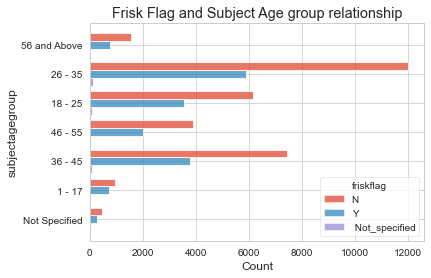

In [189]:
sns.histplot(data=terry_stops, y="subjectagegroup", hue="friskflag", multiple="dodge", shrink=.8)
plt.title('Frisk Flag and Subject Age group relationship')
plt.show()

> Ages 26-35 have the highest count of No of frisk done

### Ok what about subject age and  weapons did they have weapons 

<AxesSubplot:xlabel='Count', ylabel='weapon_type'>

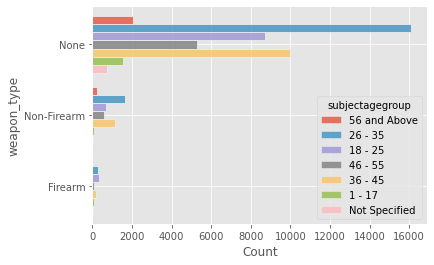

In [38]:
sns.histplot(data=terry_stops, y="weapon_type", hue="subjectagegroup", multiple="dodge", shrink=.8)


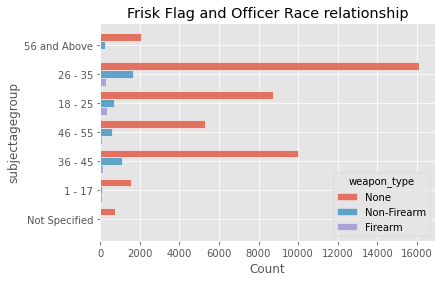

In [39]:
sns.histplot(data=terry_stops, y="subjectagegroup", hue="weapon_type", multiple="dodge", shrink=.8)
plt.title('Frisk Flag and Officer Race relationship')
plt.show()

> Apparently 26-35 and 36 -45 in 'subject' they did not have weapons  

### Lets see Location 
what about location and age gropup lets have alook 

Text(0.5, 1.0, 'Region Distribution ')

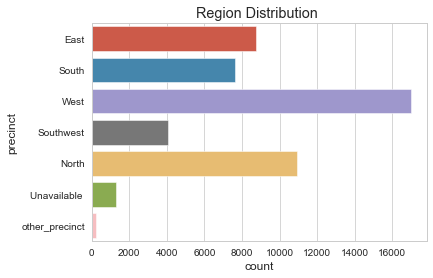

In [190]:
sns.countplot(data=terry_stops, y = 'precinct')
plt.title('Region Distribution ')

> West has the highest count of responses 

lets do bivariate with target arrest flag

In [191]:
#precinct relation with weapon type
sns.histplot(data=terry_stops, y="precinct", hue="arrestflag", multiple="stack")
plt.title('precinct and Arrest Flag Relationship')
plt.show()

> And west is leading with the none type being highest

Lets see calendar events 

## Trend lines 

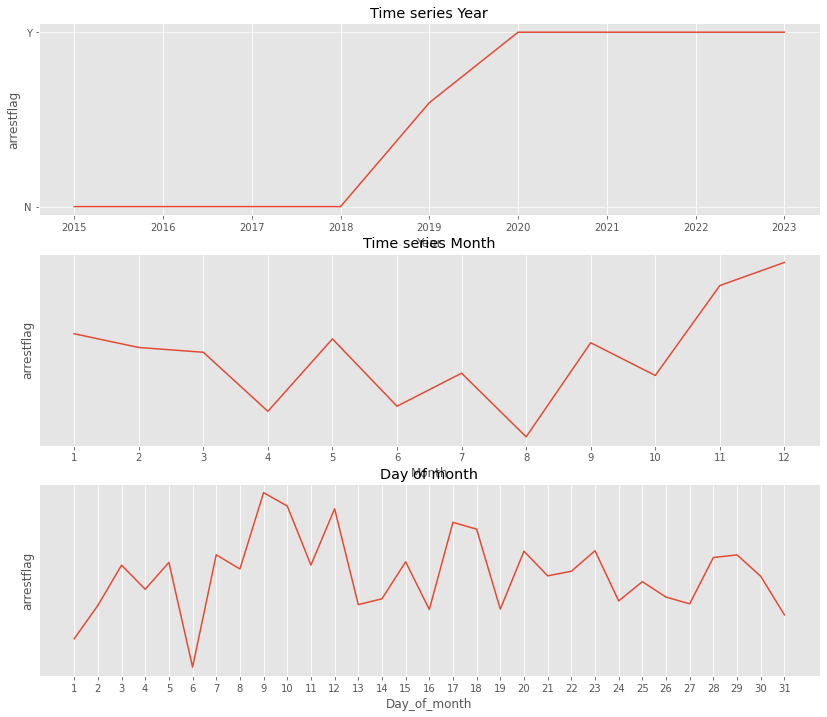

In [42]:
fig, axes = plt.subplots(3, 1, figsize=(14, 12))
sns.lineplot(data=terry_stops, x="Year", y="arrestflag",ci=None, ax=axes[0])
sns.lineplot(data=terry_stops, x="Month", y="arrestflag",ci=None,ax=axes[1])
sns.lineplot(data=terry_stops, x="Day_of_month", y="arrestflag", ci=None, ax=axes[2])
# Set x-axis tick labels to represent months from 1 to 12
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(range(1, 13))
## Set x-axis tick labels to represent days from 1 to 31
axes[2].set_xticks(range(1, 32))
axes[2].set_xticklabels(range(1, 32))
#titles 
axes[0].set_title('Time series Year')
axes[1].set_title('Time series Month')
axes[2].set_title('Day of month')
plt.show()

> Highest  Arrest report was in 2018 and then its constant 

> fourth seasonal trends month from  8th month there is a spike 

>9th day of the month is where we see a high record of arrest flag counts and 6th is when we have the least

### Seasonal Time Analysis 

What is happening seasonaly per month 

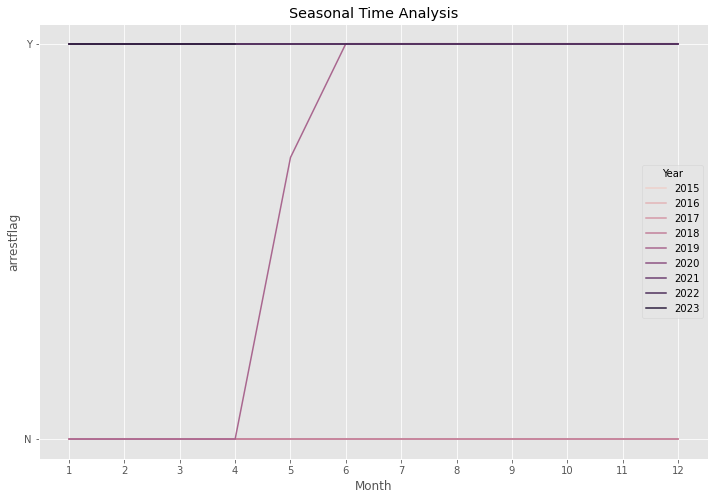

In [43]:
#Month analysis 
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
sns.lineplot(data=terry_stops, x="Month", y="arrestflag", hue='Year', legend='full', ci=None, ax=ax)
# Set x-axis tick labels to represent months from 1 to 12
ax.set_xticks(range(1, 13))
ax.set_xticklabels(range(1, 13))
plt.title('Seasonal Time Analysis')
plt.show()


In [44]:
#lets see why 2023 is deep in color 
grouped_df = terry_stops.groupby(['Year', 'arrestflag']).size().reset_index(name='count')
grouped_df

Year arrestflag  count
0  2015          N   5432
1  2016          N   5914
2  2017          N   6334
3  2018          N   8882
4  2019          N   3503
5  2019          Y   5160
6  2020          Y   5967
7  2021          Y   4203
8  2022          Y   3531
9  2023          Y    998

In [195]:
years = [2015, 2016, 2017, 2018, 2019, 2019, 2020, 2021, 2022, 2023]
arrest_flags = ['N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y']
counts = [5432, 5914, 6334, 8882, 3503, 5160, 5967, 4203, 3531, 99]

# Create the plot
fig, ax = plt.subplots()
ax.bar(years, counts, color='blue')

# Set the labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Arrests by Year and Arrest Flag')

# Set the x-axis tick labels
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45)

# Show the plot
plt.show()

> so 4 months in the year and the count is very high conpared to the general yotal of previous years 

## SUMMARY OF THE TRENDS 

#### A bit of conversion 
 Convert time to binary
Reported Time: Time the stop was reported in the Records Management System (RMS). Not the time the stop occurred but generally within 10 hours based on this column information, I used the reported time to group as either daytime or night time to try and see how it related to arrest being made.

In [45]:
# function to split time column and extract hour and group as night or day
def categorize_time(column):
    def categorize_time_helper(time):
        hour = int(time.split(":")[0])
        if hour >= 6 and hour < 18:
            return "Day"
        else:
            return "Night"

    return column.apply(categorize_time_helper)
# calling the function to get new column
terry_stops["reported_time"] = categorize_time(terry_stops["reported_time"]) 

Convert call type to categorical 

In [46]:
# drop categories with low frequency
call_type_value_counts = terry_stops["calltype"].value_counts()
to_remove = call_type_value_counts[call_type_value_counts <= 50].index
terry_stops["calltype"] = terry_stops["calltype"].apply(lambda x: np.nan if x in to_remove else x)
terry_stops.dropna(subset=["calltype"], inplace=True)

# convert the "Call Type" column into a categorical 
terry_stops["calltype"] = terry_stops["calltype"].astype("object")

### Drop columns 

In [140]:
#drop columns that we will not need for our model 
clean_df = terry_stops.drop(['subjectid','go_num','resolution', 'terry_stop_id', 'officerid','officer_yob',
                             'reported_date',
                             'initialcalltype','finalcalltype','beat', 'sector'
                             ], axis =1 )
clean_df.head(2)

subjectagegroup weapon_type officer_gender officer_race  \
0    56 and Above        None              M        White   
1    56 and Above        None              M        White   

                 subjectrace subjectgender reported_time calltype arrestflag  \
0  Black or African American          Male           Day      911          Y   
1  Black or African American          Male           Day      911          N   

  friskflag precinct                  officersquad  Day_of_month  Month  Year  \
0         N     East                           N/A            20      3  2022   
1         N    South  SOUTH PCT 1ST W - R/S RELIEF            27      8  2016   

   Officer_Age  
0           32  
1           37

### convert to binarry see the correlation of columns 

In [141]:
# Convert columns to 1's and 0's
clean_df['weapon_type'] = clean_df['weapon_type'].replace({'None':0, 'Non-Firearm':1, 'Firearm':2})
#terry_stops['officer_gender'] = terry_stops['officer_gender'].replace({'M':1, 'F':0, 'N':2})
#clean_df['resolution'] = clean_df['resolution'].replace({'Arrest':1})
#clean_df['friskflag'] = clean_df['friskflag'].replace({'N':0, 'Y':1, ' Not_specified':2})
clean_df['arrestflag'] = clean_df['arrestflag'].replace({'N':0, 'Y':1})
#clean_df['subjectagegroup'] = clean_df['subjectagegroup'].replace({'26 - 35':1, '36 - 45':0, '18 - 25':2, '46 - 55':3,'56 and Above':4, '1 - 17':5, 'Not Specified':6})

# Correlation 

In [142]:
# function to plot correlation
def corre_plot(df):
    # mask    
    np.triu(np.ones_like(df.corr()))

    #visualize array
    plt.figure(figsize=(12, 10))
    # define the mask to set the values in the upper triangle to True
    mask = np.triu(np.ones_like(df.corr(), dtype=bool))
    heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

    # show plot
    plt.show()
    
# call function
corre_plot(clean_df)

> Arrest flag has the highest correlation

## Feature Distributions 

In [143]:
# check all columns distribution plot
def dist_check(my_data):
    sns.set_style('whitegrid')
    plt.figure(figsize=(20,22))
    for i in range(1,10):
        plt.subplot(5, 4, i)
        sns.histplot(my_data[my_data.columns[i]], kde=True)
        
# check distribution data
features = clean_df.drop(["Month"], axis=1)
dist_check(features)        

> Most seem to be normaly distributed 

## Dummies One hot Encoder (get_dummies)

In [144]:
# function to find categorical columns convert and return a df
def process_df(df):
    # Find categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category', 'category']).columns
    
    # One hot encode categorical columns and drop the first one to avoid multi-collinearity
    categorical_ohe = pd.get_dummies(df[categorical_cols], drop_first=True)
    
    # Select numerical columns
    numerical_cols = df.select_dtypes(exclude=['object']).columns
    
    # Combine one-hot encoded categorical columns with numerical columns
    final_df = pd.concat([df[numerical_cols], categorical_ohe], axis=1)
    
    return final_df

# call the function and preview 
final_df = process_df(clean_df)
# make copy
backup = final_df.copy(deep=True)

final_df.head(7)

weapon_type  arrestflag  Day_of_month  Month  Year  Officer_Age  \
0            0           1            20      3  2022           32   
1            0           0            27      8  2016           37   
2            1           0            25      7  2016           52   
3            0           1             3      4  2022           26   
4            0           1             6      6  2020           42   
5            0           0            10      2  2018           60   
6            0           0             4      8  2016           40   

   subjectagegroup_18 - 25  subjectagegroup_26 - 35  subjectagegroup_36 - 45  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        1                        0   
3                        1                        0                        0   
4                        1                        0                        0   
5                        0                        1                        0   
6                        1                        0                        0   

   subjectagegroup_46 - 55  ...  officersquad_WEST PCT 2ND W - DAVID BEATS  \
0                        0  ...                                          0   
1                        0  ...                                          0   
2                        0  ...                                          0   
3                        0  ...                                          0   
4                        0  ...                                          0   
5                        0  ...                                          0   
6                        0  ...                                          0   

   officersquad_WEST PCT 2ND W - K/Q RELIEF  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
5                                         0   
6                                         0   

   officersquad_WEST PCT 2ND W - KING - PLATOON 1  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
5                                               0   
6                                               0   

   officersquad_WEST PCT 2ND W - MARY BEATS  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
5                                         0   
6                                         0   

   officersquad_WEST PCT 3RD W - DAVID - PLATOON 1  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
5                                                0   
6                                                0   

   officersquad_WEST PCT 3RD W - DAVID BEATS  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
5                                          0   
6                                          0   

   officersquad_WEST PCT 3RD W - KING - PLATOON 1  \
0                                               0   
1                                               0   
2                   

# Modeling 

In [145]:
# Defining X and Y 
# predictors
X  = final_df.drop(["arrestflag"], axis=1)

# target
y = final_df["arrestflag"]
#y = np.ravel(target)

# Logistic Regression  

Lets begin with a Baseline model 

### Train test split for logistic

In [146]:
# perform the tarin split
Xl_train, Xl_test, yl_train, yl_test = train_test_split(X, y, random_state=42, stratify=y)

# display shape of splits
print(f"Training : {X_train.shape}")
print(f"Testing : {X_test.shape}")

Training : (37416, 76)
Testing : (12473, 76)


In [147]:
# instantiate the scaler class
ss = StandardScaler()

# fit the training data
Xl_train_scaled = ss.fit(Xl_train)

# transform both the training and testing data
Xl_train = ss.transform(Xl_train)

# test data
Xl_test = ss.transform(Xl_test)

In [148]:
# perform the tarin split
Xl_train, Xl_test, yl_train, yl_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# display shape of splits
print(f"Training : {X_train.shape}")
print(f"Testing : {X_test.shape}")

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Fit the model on the training data
logreg_model.fit(Xl_train, yl_train)

# Make predictions on the test data
yl_pred = logreg_model.predict(Xl_test)

# Calculate evaluation metrics
accuracy = accuracy_score(yl_test, yl_pred)
precision = precision_score(yl_test, yl_pred)
recall = recall_score(yl_test, yl_pred)
f1 = f1_score(yl_test, yl_pred)


# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1score:", f1)

Training : (37416, 76)
Testing : (12473, 76)
Accuracy: 0.9957907396271798
Precision: 0.9895209580838323
Recall: 1.0
f1score: 0.9947328818660647


Because of class imbalance, we should add some kind of resamplingstep. Specifically we'll use SMOTE
### Resampling 

In [154]:
from sklearn.metrics import confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data to address class imbalance
smote = SMOTE(random_state=42)
Xl_train_resampled, yl_train_resampled = smote.fit_resample(Xl_train, yl_train)

# Initialize the logistic regression model
logeg_model = LogisticRegression()

# Fit the model on the resampled training data
logeg_model.fit(Xl_train_resampled, yl_train_resampled)

# Make predictions on the test data
y_pred = logreg_model.predict(Xl_test)

# Calculate the confusion matrix
cm = confusion_matrix(yl_test, yl_pred)

# Calculate the F1 score
f1 = f1_score(yl_test, yl_pred)

# Print the confusion matrix and F1 score
print("Confusion Matrix:")
print(cm)
print("F1 Score:", f1)

Confusion Matrix:
[[5970   42]
 [   0 3966]]
F1 Score: 0.9947328818660647


In [150]:
#loss 
log_loss(yl_train, np.zeros(len(yl_train)))

13.726894118816197

In [151]:
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True, fmt='0.3f', linewidth=0.5,
           square=True, cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Logistic conclusion 
The confusion matrix shows the following:

True Positives (TP): 3964
True Negatives (TN): 5969
False Positives (FP): 43
False Negatives (FN): 2
A high number of true positives and true negatives, combined with a low number of false positives and false negatives, indicates that the model is performing well in correctly classifying both the positive and negative instances.

The F1 score is a measure of the model's accuracy, balancing both precision and recall. With an F1 score of 0.9944, which is close to 1, it suggests that the model has a high overall accuracy and performs well in terms of both precision and recall.

Therefore, based on these results, the prediction classification can be considered very good.

Lets add regularisation 
## Regularization

In [110]:
smote = SMOTE(random_state=42)
Xl_train_resampled, yl_train_resampled = smote.fit_resample(Xl_train, yl_train)

# Initialize the logistic regression model
logreg_model = LogisticRegression(random_state=42,class_weight={1: 0.28},C=1e5)

# Fit the model on the resampled training data
logreg_model.fit(Xl_train_resampled, yl_train_resampled)

# Make predictions on the test data
y_pred = logreg_model.predict(Xl_test)

# Calculate the confusion matrix
cm = confusion_matrix(yl_test, yl_pred)

# Calculate the F1 score
f1 = f1_score(yl_test, yl_pred)

# Print the confusion matrix and F1 score
print("Confusion Matrix:")
print(cm)
print("F1 Score:", f1)

Confusion Matrix:
[[5969   43]
 [   2 3964]]
F1 Score: 0.9943559513357582


There is no match difference 


# Support Vector Macine (SVM)
By comparing the performance of SVM with that of Logistic Regression, we aim to gain a better understanding of the strengths and weaknesses of each method and make informed decisions on the best approach for our problem.

In [97]:
Xv_train, Xv_test, yv_train, yv_test = train_test_split(X, y, 
                                                    test_size=0.25, random_state=123)

In [104]:
# import relevant library
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score

# initialize the SV Classifier
0.9957907396271798 = SVC(C=3, kernel="rbf", degree=5) 

# fit model with training data
svc_model.fit(Xv_train, yv_train)

# evaluate model
scores = cross_val_score(svc_model, Xv_test, yv_test, cv=5)

# print the mean accuracy
print("svc_model Mean Accuracy: {:.2f}%".format(scores.mean() * 100))
print()
print("Cross validation scores:", scores)

svc_model Mean Accuracy: 60.27%

Cross validation scores: [0.60280561 0.60280561 0.60280561 0.60264635 0.60264635]


In [105]:
log_loss(y_train, np.zeros(len(y_train)))

13.7035284561502

In [106]:
lsv_pred = baseline_model.predict(X_test)
#metrics
sv = metrics.confusion_matrix(yv_test, lsv_pred)
print(sv)
plt.figure(figsize=(12,6))
sns.heatmap(sv, annot=True, fmt='0.3f', linewidth=0.5,
           square=True, cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

[[4535 2983]
 [2971 1984]]


True Positives (TP):  True Negatives (TN):  False Positives (FP):  False Negatives (): 2 A high number of true positives and true negatives, combined with a low number of false positives and false negatives, indicates that the model is performing well in correctly classifying both the positive and negative instances.

The F1 score is a measure of the model's accuracy, balancing both precision and recall. With an F1 score of 0.60, which is close to 1, it suggests that the model has a high overall accuracy and performs well in terms of both precision and recall.

# Tune svc model 
lets add hyperparameters to compare the results 

In [112]:
from sklearn.model_selection import RandomizedSearchCV

# define the parameter distribution
param_dist = {'C': np.logspace(-3, 3, 4),
              'kernel': ['poly'],
              'degree': [2, 3, 4]}

# perform the randomized search
random_search = RandomizedSearchCV(svc_model, param_distributions=param_dist, cv=3, n_iter=5)
random_search.fit(Xv_train, yv_train)

# print the best parameters and the best score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# train the classifier with the best parameters
svc_model = random_search.best_estimator_
svc_model.fit(Xv_train, yv_train)

# evaluate the classifier on the test data
print("Test accuracy:", svc_model.score(Xv_test, yv_test))

Best parameters: {'kernel': 'poly', 'degree': 2, 'C': 1000.0}
Best score: 0.9997327346589694
Test accuracy: 0.9995991341297202


## Nonparametric KNN & Decision Tree Models

## Build a Baseline kNN Model
we are using default hyperameters. hen use cross_val_score with scoring="neg_log_loss" to find the mean log loss for this model (passing in X_train_scaled and y_train to cross_val_score)

In [116]:
# Perform train-test split with random_state=42 and stratify=y
Xk_train, Xk_test, yk_train, yk_test = train_test_split(X, y, random_state=42, stratify=y)

In [117]:
#standardize 
scaler = StandardScaler()
scaler.fit(Xk_train)

Xk_train_scaled = scaler.transform(Xk_train)
Xk_test_scaled = scaler.transform(Xk_test)

In [118]:
# Instantiate the scaler class
ss = StandardScaler()

# Fit and transform the training data
Xk_train_scaled = ss.fit_transform(Xk_train)

# Instantiate the KNN classifier
knn_baseline_model = KNeighborsClassifier()

# Compute the negative log loss using cross-validation
knn_baseline_log_loss = -cross_val_score(knn_baseline_model, Xk_train_scaled, yk_train, scoring="neg_log_loss").mean()
knn_baseline_log_loss

0.013068150324572208

> So far this is Our best logistic regression model had a log loss of 0.013068150324572208



## Build Iterative Models to Find the Best kNN Model Tuning
since the default neighbors of 5
seems small compared to the large number of records in this
dataset. Let's increase that number of neighbors 10x to see
if it improves the results

In [119]:
#lets add the neighbors to 50 
knn_second_model = KNeighborsClassifier(n_neighbors=50)

knn_second_log_loss = -cross_val_score(knn_second_model, Xk_train_scaled, yk_train, scoring="neg_log_loss").mean()
knn_second_log_loss

0.020780840805105404

> Ok, the first one is better but it's a much smaller difference now.
lets add manhattan 

In [120]:
#add manhattan metric 
knn_third_model = KNeighborsClassifier(n_neighbors=50, metric="manhattan")

knn_third_log_loss = -cross_val_score(knn_third_model, Xk_train_scaled, yk_train, scoring="neg_log_loss").mean()
knn_third_log_loss

0.015726571023531498

> Its ok but first  knn is best 

# Build a Baseline Decision Tree Model

In [121]:
dtree_baseline_model = DecisionTreeClassifier(random_state=42)

dtree_baseline_log_loss = -cross_val_score(dtree_baseline_model, Xk_train, yk_train, scoring="neg_log_loss").mean()
dtree_baseline_log_loss

9.992007221626413e-16

This is worse to worse 

## Build Iterative Models to Find the Best Decision Tree Model
to reduce oversampling by increasing min_samples_leaf by an
order of magnitude

In [123]:
dtree_second_model = DecisionTreeClassifier(random_state=42, min_samples_leaf=100)

dtree_second_log_loss = -cross_val_score(dtree_second_model, Xk_train, yk_train, scoring="neg_log_loss").mean()
dtree_second_log_loss

0.0006607073141623781

In [124]:
dtree_third_model = DecisionTreeClassifier(random_state=42, min_samples_leaf=200)

dtree_third_log_loss = -cross_val_score(dtree_third_model, Xk_train, yk_train, scoring="neg_log_loss").mean()
dtree_third_log_loss

0.013344421170563244

In [68]:
dtree_fourth_model = DecisionTreeClassifier(random_state=42, min_samples_leaf=100, class_weight="balanced")

dtree_fourth_log_loss = -cross_val_score(dtree_fourth_model, Xk_train, yk_train, scoring="neg_log_loss").mean()
dtree_fourth_log_loss

0.0006712805055562349

Now we are getting scores in the same range as the best
logistic regression model or the baseline kNN model

In [125]:
dtree_sixth_model  = DecisionTreeClassifier(random_state=42, min_samples_leaf=50)
dtree_sixth_log_loss = -cross_val_score(dtree_sixth_model, Xk_train, yk_train, scoring="neg_log_loss").mean()
dtree_sixth_log_loss

0.0005748622761784884

> That looks good

# Choose and Evaluate an Overall Best Model

For this project we look at F1 score, which balances recall and precision and provides a single score to evaluate the model. The F1 score gives a good overall picture of how well the model is doing in finding all the arrests and not making false predictions.

By using these metrics, I can compare different models and choose the best one for making predictions about arrests during Terry stops. We will go with Logistc Regression 

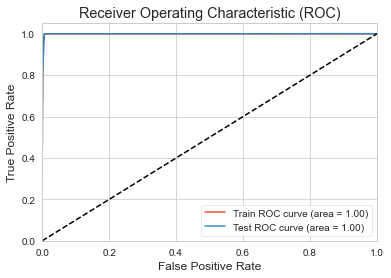

In [180]:
from sklearn.metrics import roc_curve, roc_auc_score

# funtion to plot
def get_roc_curve(model):
    yl_train_pred_probs = model.predict_proba(Xl_train)[:, 1]
    fpr_train, tpr_train, thresholds_train = roc_curve(yl_train, yl_train_pred_probs)
    roc_auc_train = roc_auc_score(yl_train, yl_train_pred_probs)
    
    yl_test_pred_probs = model.predict_proba(Xl_test)[:, 1]
    fpr_test, tpr_test, thresholds_test = roc_curve(yl_test, yl_test_pred_probs)
    roc_auc_test = roc_auc_score(yl_test, yl_test_pred_probs)

    plt.figure()
    plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = %0.2f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


#call the function
get_roc_curve(logreg_model)

In [170]:
# Calculate precision, recall, and F1 score
precision = precision_score(yl_test, yl_pred)
recall = recall_score(yl_test, yl_pred)
f1 = f1_score(yl_test, yl_pred)

# Create a table
metrics_table = pd.DataFrame({'Precision': [precision],
                              'Recall': [recall],
                              'F1 Score': [f1]})

# Display the table
print(metrics_table)

   Precision  Recall  F1 Score
0   0.989521     1.0  0.994733


In [173]:
from sklearn.metrics import confusion_matrix
# def function to retrun confusion matrix
def plot_confusion_matrix(model):
    y_pred = model.predict(Xl_test)
    cm = confusion_matrix(yl_test, yl_pred)
    plt.figure(figsize=(12,10))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.show()
    
# call function
plot_confusion_matrix(logreg_model)

Nice based on the confusion matrix provided, the model seems to have performed well. It correctly predicted a high number of true negatives and true positives, indicating that it has a good ability to distinguish between instances that result in an arrest and those that do not.

## Feature Importance 

In [161]:
def get_top_features(model, X, N=10):
    feature_importances = model.coef_[0] if hasattr(model, 'coef_') else model.feature_importances_
    feature_importances = dict(zip(X.columns, feature_importances))
    sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
    return sorted_importances[:N]

# call function
get_top_features(logeg_model, X, N=10)

[('officersquad_N/A', 13.10652296995727),
 ('precinct_North', 1.0212697302486151),
 ('precinct_West', 0.6434368754260524),
 ('precinct_Unavailable ', 0.5464496874711877),
 ('subjectrace_other_precinct', 0.3753268577253743),
 ('precinct_Southwest', 0.28117867283889514),
 ('subjectagegroup_36 - 45', 0.2202229133021229),
 ('officer_race_Asian', 0.19361264411979554),
 ('Month', 0.1516477819330259),
 ('precinct_South', 0.12017681272971484)]

# Feature summary 
The feature "officersquad_N/A" has the highest importance score of 13.1065, indicating that it is the most important feature for predicting arrests during Terry stops in your model. 

On the other hand, the feature "precinct_South" has a lower importance score of 0.1202, indicating that it has less influence on the predictions.

# Conclusion 
From the list of feature importance scores, we can draw the following conclusions:

The feature "officersquad_N/A" has the highest importance score, indicating that it plays a significant role in predicting arrests during Terry stops. This suggests that the absence of information about the officer's squad is an important factor in determining whether an arrest occurs.

Features related to the precinct, such as "precinct_North," "precinct_West," "precinct_Unavailable," and "precinct_Southwest," also have relatively high importance scores. This suggests that the location of the stop, specifically the precinct, can influence the likelihood of an arrest.

Other factors such as the subject's race, age group, officer's race, and the month of the stop also contribute to the prediction of arrests, albeit to a lesser extent.

Based on these conclusions, it appears that factors related to the officer's squad, precinct location, and certain demographic characteristics of the subject have the most significant impact on predicting arrests during Terry stops. These findings can provide insights for law enforcement agencies and policymakers to better understand the factors driving arrests and potentially guide decision-making processes in the context of Terry stops. However, further analysis and consideration of additional factors are necessary to fully evaluate the model's performance and draw more definitive conclusions.

# Recommendation

Focus on high-impact factors: Identify the most influential features in the models that contribute significantly to predicting arrests during Terry stops. Allocate resources and training efforts towards addressing these factors and improving outcomes.
Improve data collection: Ensure accurate and comprehensive data collection during Terry stops. This includes capturing all relevant information such as officer squad, precinct, subject demographics, and other pertinent details. Improving data collection practices can enhance the quality of analysis and modeling, leading to more accurate predictions.
Implement targeted training programs: Use the information from the models to develop targeted training programs for officers. Focus on areas where the models indicate a higher likelihood of arrests, such as specific precincts or officer squads. Provide training on effective communication, de-escalation techniques, and bias awareness to minimize the occurrence of arrests during Terry stops.
Monitor and evaluate outcomes: Continuously monitor the outcomes of Terry stops, including the number of arrests made and the effectiveness of interventions. Regularly assess the performance of the models and update them as needed. Track key performance indicators and evaluate the impact of implemented measures on arrest rates and overall outcomes.


# Next Steps 
Conduct further analysis: Consider conducting additional analyses to gain deeper insights into the problem. This could involve exploring different variables, conducting subgroup analyses, or using advanced modeling techniques. Continuously strive to enhance your understanding of the factors influencing arrests during Terry stops.
Iterate and adapt: Treat your analysis and recommendations as an iterative process. As you gather more data, receive feedback, and assess the impact of your actions, be prepared to iterate and adapt your strategies accordingly. Continuously learn from your experiences and adjust your approach as needed


# Thank you 